# 6.09 Lesson 1 key concepts
## Reading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)


In [2]:
data = pd.read_csv('/Users/amandamac/IronHackerDA/learningSet.csv')

/usr/local/Cellar/jupyterlab/3.0.16_1/libexec/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
print(data.shape)
data.head()

(95412, 481)


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.

In [4]:
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [5]:
data['TARGET_D'].describe()

count    95412.000000
mean         0.793073
std          4.429725
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        200.000000
Name: TARGET_D, dtype: float64

To solve this problem we will first build a classification model to predict who will more likely respond and then for those respondents, we will build a regression model to predict the donation amount.

Then we can use the cost matrix to calculate the total benefit from the donations

Some of the challenges with the dataset are as follows:

Large number of features: The data set has over 450 features. Hence selecting the right features for the model is very critical and at the same time it is not easy as the same traditional ways of removing features is not effective given the large number of features. Apart from feature selection, feature extraction (creating your own features using the existing features) is also not easy in this case.
Sparsity of the dataset: There are a lot of features with a large number of null values.
Data imbalance: For developing a classification, there is a huge imbalance in the training dataset with only approximately 5000 values for one category as compared to cover 95,000 instances for the other category.

# 7.01 Lesson 2 key concepts
## Review data cleaning process

There are a lot of columns that have a very high percentage of null values. It is a highly sparse dataset. 
We can decide on a threshold and then remove those variables. There is no rule of thumb to decide on this threshold value. 
Sometimes it can as low as 25%-30%. And sometimes in some data sets you might find that even though there are more than 50% missing values in a column, you might have to include that variable in your analysis. 
A lot of it depends on the business context as well. In this case we will take this threshold to be 25% and then check the definitions of the columns filtered, to see if there is any column that we might want to keep.

In [6]:
nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,OSOURCE,0.000000
2,TCODE,0.000000
3,STATE,0.000000
4,ZIP,0.000000
...,...,...
476,MDMAUD_R,0.000000
477,MDMAUD_F,0.000000
478,MDMAUD_A,0.000000
479,CLUSTER2,0.001383


In [7]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0]

,column_name,nulls_percentage
16,AGE,0.248030
23,NUMCHLD,0.870184
24,INCOME,0.223096
26,WEALTH1,0.468830
28,MBCRAFT,0.553955
...,...,...
455,RAMNT_24,0.814090
466,NEXTDATE,0.104526
467,TIMELAG,0.104526
479,CLUSTER2,0.001383


In [8]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>0.25]
columns_above_threshold['column_name']

23      NUMCHLD
26      WEALTH1
28      MBCRAFT
29     MBGARDEN
30      MBBOOKS
         ...   
451    RAMNT_20
452    RAMNT_21
453    RAMNT_22
454    RAMNT_23
455    RAMNT_24
Name: column_name, Length: 72, dtype: object

In [9]:
drop_columns_list = list(columns_above_threshold['column_name'])
print(drop_columns_list)

['NUMCHLD', 'WEALTH1', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN', 'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP', 'WEALTH2', 'ADATE_5', 'ADATE_10', 'ADATE_13', 'ADATE_15', 'ADATE_17', 'ADATE_19', 'ADATE_20', 'ADATE_21', 'ADATE_22', 'ADATE_23', 'ADATE_24', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_8', 'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14', 'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20', 'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_8', 'RAMNT_9', 'RAMNT_10', 'RAMNT_11', 'RAMNT_12', 'RAMNT_13', 'RAMNT_14', 'RAMNT_15', 'RAMNT_16', 'RAMNT_17', 'RAMNT_18', 'RAMNT_19', 'RAMNT_20', 'RAMNT_21', 'RAMNT_22', 'RAMNT_23', 'RAMNT_24']


From the list above that includes the columns that have over 25% null values, you discussed with your manager you were told that the following columns are important -> wealth1, wealth2
We will remove these variables from the above list 
RDATE3, RAMNT_3 are important but they have too many null values 

# 7.01 Activity 2
## Remove columns with null values greater than a specified threshold

In [10]:
drop_columns_list.remove('WEALTH1')
drop_columns_list.remove('WEALTH2')

In [11]:
data = data.drop(drop_columns_list, axis=1)

In [12]:
#data = data.drop(['NUMCHLD', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN', 'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP', 'ADATE_5', 'ADATE_10', 'ADATE_13', 'ADATE_15', 'ADATE_17', 'ADATE_19', 'ADATE_20', 'ADATE_21', 'ADATE_22', 'ADATE_23', 'ADATE_24', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_8', 'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14', 'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20', 'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_8', 'RAMNT_9', 'RAMNT_10', 'RAMNT_11', 'RAMNT_12', 'RAMNT_13', 'RAMNT_14', 'RAMNT_15', 'RAMNT_16', 'RAMNT_17', 'RAMNT_18', 'RAMNT_19', 'RAMNT_20', 'RAMNT_21', 'RAMNT_22', 'RAMNT_23', 'RAMNT_24'], axis=1)

In [13]:
data.shape

(95412, 411)

## More data cleaning

In [14]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,ADATE_16,ADATE_18,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,F,NaN,0,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9508.0,9506.0,9503.0,9501.0,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,,,,XXXX,S1,14,46.0,E,H,,,,M,6.0,M,9.0,16,3,0,15,55,11,6,2,1,,,,9.0,2,,,,,,,,,,,,,,,,,,,,,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83

We can see that there are a lot of columns that have blank spaces which represent no value in this case. 
They were not identified as null values by python as they are empty spaces that are read as character values by 
python. We will replace those values by NaNs and repeat the analysis 

Before we do that we will replace the blank values from the column "MAILCODE" by "A" which would mean the address is okay (pl check the definition of the variable in the description)

In [15]:
data['MAILCODE'].value_counts()

     94013
B     1399
Name: MAILCODE, dtype: int64

In [16]:
data['MAILCODE'] = data['MAILCODE'].apply(lambda x: x.replace(" ", "A"))

In [17]:
# Now we can replace the rest space characters with np.NaN

In [18]:
data = data.apply(lambda x: x.replace(" ", np.NaN))

In [19]:
data.shape

(95412, 411)

# 7.01 Activity 3
## Remove columns with null values greater than a specified threshold

In [20]:
nulls_percent_df1 = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_df1.columns = ['column_name', 'nulls_percentage']
nulls_percent_df1[nulls_percent_df1['nulls_percentage']!=0]
columns_above_threshold = nulls_percent_df1[nulls_percent_df1['nulls_percentage']>0.25]
columns_above_threshold['column_name']

6      PVASTATE
9      RECINHSE
10        RECP3
11      RECPGVG
12     RECSWEEP
17      AGEFLAG
19      CHILD03
20      CHILD07
21      CHILD12
22      CHILD18
25      WEALTH1
35        SOLP3
36        SOLIH
37        MAJOR
38      WEALTH2
39      GEOCODE
40     COLLECT1
41     VETERANS
42        BIBLE
43        CATLG
44        HOMEE
45         PETS
46       CDPLAY
47       STEREO
48     PCOWNERS
49        PHOTO
50       CRAFTS
51       FISHER
52     GARDENIN
53        BOATS
54       WALKER
55     KIDSTUFF
56        CARDS
57       PLATES
58      LIFESRC
59     PEPSTRFL
361       RFA_5
366      RFA_10
369      RFA_13
371      RFA_15
373      RFA_17
375      RFA_19
376      RFA_20
377      RFA_21
378      RFA_22
379      RFA_23
380      RFA_24
Name: column_name, dtype: object

In [21]:
len(columns_above_threshold)

47

In [22]:
drop_columns_list = list(columns_above_threshold['column_name'])
print(drop_columns_list)

['PVASTATE', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'AGEFLAG', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'WEALTH1', 'SOLP3', 'SOLIH', 'MAJOR', 'WEALTH2', 'GEOCODE', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES', 'LIFESRC', 'PEPSTRFL', 'RFA_5', 'RFA_10', 'RFA_13', 'RFA_15', 'RFA_17', 'RFA_19', 'RFA_20', 'RFA_21', 'RFA_22', 'RFA_23', 'RFA_24']


We would again repeat the same exercise as the last time. We will discuss it with the team, manager, and/or other stakeholders to see which columns we need to retain here. 

Like last time we will keep the following -> wealth1, wealth2 along with these VETERANS, SOLIH

In [23]:
drop_columns_list.remove('WEALTH1')
drop_columns_list.remove('WEALTH2')
drop_columns_list.remove('VETERANS')
drop_columns_list.remove('SOLIH')

In [24]:
data = data.drop(drop_columns_list, axis=1)
data.shape

(95412, 368)

In [25]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,DOB,NOEXCH,MDMAUD,DOMAIN,CLUSTER,AGE,HOMEOWNR,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLIH,WEALTH2,VETERANS,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,ADATE_16,ADATE_18,RFA_2,RFA_3,RFA_4,RFA_6,RFA_7,RFA_8,RFA_9,RFA_11,RFA_12,RFA_14,RFA_16,RFA_18,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,A,3712,0,XXXX,T2,36,60.0,NaN,NaN,F,NaN,0,NaN,0,39,34,18,10,2,1,NaN,5.0,NaN,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9508.0,9506.0,9503.0,9501.0,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,A,5202,0,XXXX,S1,14,46.0,H,6.0,M,9.0,16,3,0,15,55,11,6,2,1,NaN,9.0,NaN,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92

# 7.01 Lesson 4 key concepts
## Separating Target, Numerical Features, and Categorical Features

Since we have a huge number of features, it would be easier to work independently on numerical features and categorical features.

For the target variables, for now we will retain them both together. But later, we will build a classification model first where we would need the column TARGET_B only.

In [26]:
Y = data[['TARGET_B', 'TARGET_D']]
Y.head()

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [27]:
numerical = data.select_dtypes(np.number)
numerical = numerical.drop(columns = ['TARGET_B', 'TARGET_D'])
numerical.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,ADATE_16,ADATE_18,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9508.0,9506.0,9503.0,9501.0,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9509.0,NaN,9503.0,NaN,12,9702,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,NaN,3.0,1.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,

In [28]:
categorical = data.select_dtypes(object)
categorical.head()

,OSOURCE,STATE,ZIP,MAILCODE,NOEXCH,MDMAUD,DOMAIN,CLUSTER,HOMEOWNR,GENDER,DATASRCE,SOLIH,VETERANS,RFA_2,RFA_3,RFA_4,RFA_6,RFA_7,RFA_8,RFA_9,RFA_11,RFA_12,RFA_14,RFA_16,RFA_18,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,A,0,XXXX,T2,36,NaN,F,NaN,NaN,NaN,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,A,0,XXXX,S1,14,H,M,3,NaN,NaN,L2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,NaN,L1E,NaN,L,G,X,X,X,A
2,AMH,NC,27017,A,0,XXXX,R2,43,U,M,3,NaN,NaN,L4E,S4E,S4E,S4E,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4D,L,E,X,X,X,C
3,BRY,CA,95953,A,0,XXXX,R2,44,U,F,3,NaN,NaN,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S2D,L,E,X,X,X,C
4,NaN,FL,33176,A,0,XXXX,S2,16,H,F,3,12,NaN,L2F,A2F,A2F,A1D,I2D,A1E,A1E,A1E,A1E,L3D,L3D,A2D,L,F,X,X,X,A


## Working with categorical columns

We will work with the categorical features first. Look at the columns one by one. Some of the operations which we will perform are:

- Replace null values with the most occurring categories
- Reduce the number of categories in a column by grouping

It is important to note that some columns are defined by python as categorical/object types. There might be other columns defined as numerical that we want as categorical. We will look them later when we were working on numerical types.

In [43]:
categorical.isna().sum()

STATE           0
MAILCODE        0
NOEXCH          7
MDMAUD          0
DOMAIN       2316
CLUSTER      2316
HOMEOWNR    22228
GENDER          0
DATASRCE    21280
SOLIH       89212
VETERANS    84986
RFA_2           0
RFA_3        1950
RFA_4        2312
RFA_6        3557
RFA_7        8874
RFA_8        3511
RFA_9       11245
RFA_11      10422
RFA_12       8923
RFA_14      18867
RFA_16      20417
RFA_18      21263
RFA_2R          0
RFA_2A          0
MDMAUD_R        0
MDMAUD_F        0
MDMAUD_A        0
GEOCODE2      319
dtype: int64

## Categorical Variables

Here we will try to reduce the number of categories. An ideal way would have been to group the states into 
regions. But in this case we will group all the states with counts less than 2500 into one category "other"

In [30]:
df = pd.DataFrame(categorical['STATE'].value_counts()).reset_index()
df.columns = ['state', 'count']
other_states = list(df[df['count']<2500]['state'])

def clean_state(x):
    if x in other_states:
        return 'other'
    else:
        return x
categorical['STATE'] = list(map(clean_state, categorical['STATE']))

<ipython-input-30-c50ceaf7ee2c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['STATE'] = list(map(clean_state, categorical['STATE']))


In [31]:
categorical['STATE'].value_counts()

other    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: STATE, dtype: int64

# Lab | Revisiting Machine Learning Case Study

In [46]:
nulls_percent_df2 = pd.DataFrame(categorical.isna().sum()/len(data)).reset_index()
nulls_percent_df2.columns = ['column_name', 'nulls_percentage']
nulls_percent_df2[nulls_percent_df2['nulls_percentage']!=0]
columns_above_threshold1 = nulls_percent_df2[nulls_percent_df2['nulls_percentage']>0.01]
columns_above_threshold1['column_name']

4       DOMAIN
5      CLUSTER
6     HOMEOWNR
8     DATASRCE
9        SOLIH
10    VETERANS
12       RFA_3
13       RFA_4
14       RFA_6
15       RFA_7
16       RFA_8
17       RFA_9
18      RFA_11
19      RFA_12
20      RFA_14
21      RFA_16
22      RFA_18
Name: column_name, dtype: object

In [33]:
categorical['OSOURCE'].value_counts()

MBC    4539
SYN    3563
AML    3430
BHG    3324
IMP    2986
       ... 
MDD       1
NRM       1
HDP       1
CRP       1
VIC       1
Name: OSOURCE, Length: 895, dtype: int64

In [34]:
categorical['ZIP'].value_counts()

85351     61
92653     59
85710     54
95608     50
60619     45
          ..
70058-     1
93024      1
96306      1
30060-     1
32776-     1
Name: ZIP, Length: 19938, dtype: int64

In [35]:
categorical['VETERANS'].value_counts()

Y    10426
Name: VETERANS, dtype: int64

In [37]:
drop_list = categorical[["OSOURCE","ZIP"]]
data = data.drop(drop_list, axis=1)
categorical = categorical.drop(drop_list, axis=1)

In [38]:
categorical["GENDER"].value_counts()

F    51277
M    39094
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [39]:
def clean_gender(gender):
    if gender == 'U':
        return 'other'
    elif gender == 'J':
        return 'other'
    elif gender == 'C':
        return 'other'
    elif gender == 'A':
        return 'other'
    elif gender == 'M':
        return 'M'
    else:
        return "F"

categorical["GENDER"] = categorical["GENDER"].apply(clean_gender)

In [40]:
categorical["GENDER"].value_counts()

F        54234
M        39094
other     2084
Name: GENDER, dtype: int64

In [41]:
print(categorical['GENDER'].value_counts())
categorical['GENDER'] = categorical['GENDER'].fillna('F')

F        54234
M        39094
other     2084
Name: GENDER, dtype: int64


# 7-01 and 7-02

In [80]:
categorical["DOMAIN"].value_counts(dropna=False)
categorical["DOMAIN"] = categorical["DOMAIN"].fillna("C4")

In [82]:
def domain_average(domain):
    if domain == "U3":
        return "U2"
    elif domain == "U4":
        return "U3"
    elif domain == "C3":
        return "C2"
    elif domain == "C4":
        return "C3"
    else:
        return domain

categorical["DOMAIN"] = categorical["DOMAIN"].apply(lambda x:domain_average(x))

In [83]:
categorical["DOMAIN_A"] = list(map(lambda x: x[0], categorical["DOMAIN"]))
categorical["DOMAIN_B"] = list(map(lambda x: x[1], categorical["DOMAIN"]))
categorical = categorical.drop(columns=["DOMAIN_A"])

In [61]:
drop_list = []

In [51]:
categorical["MAILCODE"].value_counts(dropna=False)
categorical["NOEXCH"].value_counts(dropna=False)
categorical["MDMAUD"].value_counts(dropna=False)

XXXX    95118
C1CM       65
L1CM       44
I1CM       37
D2CM       28
C2CM       24
D1CM       20
L2CM       15
L1LM        8
C1LM        8
I2CM        7
D5CM        5
D5MM        5
D2MM        4
C5CM        3
C2MM        3
C2LM        3
D5TM        3
I1LM        3
I5CM        1
C1MM        1
I5MM        1
C5MM        1
I2MM        1
L1MM        1
L2LM        1
C5TM        1
L2TM        1
Name: MDMAUD, dtype: int64

In [62]:
drop_list.append("MAILCODE")
drop_list.append("NOEXCH")
drop_list.append("C")

In [65]:
categorical["MDMAUD_R"].value_counts(dropna=False)
drop_list = drop_list + ["MDMAUD_R", "MDMAUD_F", "MDMAUD_A"]

In [67]:
categorical["CLUSTER"].value_counts()
categorical["CLUSTER"] = categorical["CLUSTER"].fillna("40")

In [70]:
categorical["HOMEOWNR"].value_counts(dropna=False)
categorical["HOMEOWNR"] = categorical["HOMEOWNR"].fillna("U")

In [84]:
categorical = categorical.drop(drop_list, axis=1)
categorical.isna().sum()

STATE           0
DOMAIN          0
CLUSTER         0
HOMEOWNR        0
GENDER          0
DATASRCE        0
SOLIH       89212
VETERANS    84986
RFA_2           0
RFA_3        1950
RFA_4        2312
RFA_6        3557
RFA_7        8874
RFA_8        3511
RFA_9       11245
RFA_11      10422
RFA_12       8923
RFA_14      18867
RFA_16      20417
RFA_18      21263
RFA_2R          0
RFA_2A          0
GEOCODE2        0
DOMAIN_B        0
dtype: int64

In [75]:
categorical["DATASRCE"].value_counts(dropna=False)
categorical["DATASRCE"] = categorical["DATASRCE"].fillna("3")

In [76]:
categorical["GEOCODE2"].value_counts(dropna=False)
categorical["GEOCODE2"] = categorical["GEOCODE2"].fillna("A")

In [99]:
categorical['RFA_2'].value_counts(dropna=False)
drop_list2 = []
for col_name in categorical.columns:
    if "RFA"in col_name:
        drop_list2.append(col_name)
        
drop_list2.remove("RFA_2R")
drop_list2.remove("RFA_2A")

categorical = categorical.drop(drop_list2, axis=1)
categorical.isna().sum()

STATE           0
DOMAIN          0
CLUSTER         0
HOMEOWNR        0
GENDER          0
DATASRCE        0
SOLIH       89212
VETERANS    84986
RFA_2R          0
RFA_2A          0
GEOCODE2        0
DOMAIN_B        0
dtype: int64

In [58]:
numerical["ADATE_2"].value_counts(dropna=False)

9706    95399
9704       13
Name: ADATE_2, dtype: int64

In [78]:
numerical = numerical[numerical.columns.drop(list(numerical.filter(regex='ADATE_')))]

In [129]:
numerical.isna().sum()
nulls_percent_num = pd.DataFrame(numerical.isna().sum()/len(numerical)).reset_index()
nulls_percent_num.columns = ['column_name', 'nulls_percentage']
nulls_percent_num[nulls_percent_num['nulls_percentage']!=0]

,column_name,nulls_percentage


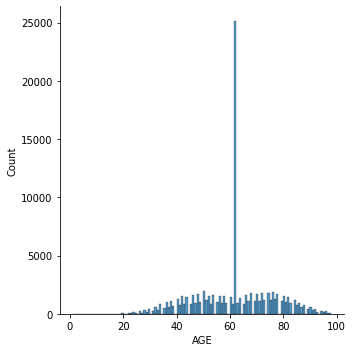

In [95]:
numerical["AGE"].value_counts(dropna=False)
numerical["AGE"] = numerical["AGE"].fillna(np.mean(numerical["AGE"]))
sns.displot(numerical["AGE"])
plt.show()

In [96]:
numerical["INCOME"] = numerical["INCOME"].astype('object')
numerical["INCOME"] = numerical["INCOME"].fillna("5.0")

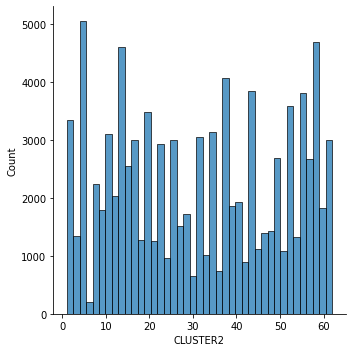

In [98]:
sns.displot(numerical[numerical["CLUSTER2"].isna()==False]["CLUSTER2"])
plt.show()

In [100]:
numerical["CLUSTER2"] =numerical["CLUSTER2"].fillna(np.ceil(np.mean(numerical["CLUSTER2"])))

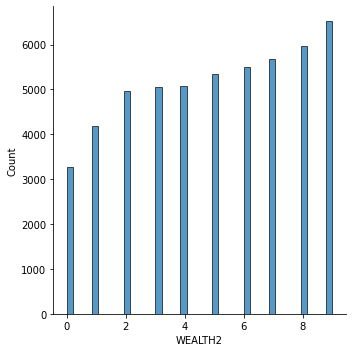

In [112]:
numerical["WEALTH2"].value_counts(dropna=False)
sns.displot(numerical[numerical["WEALTH2"].isna()==False]["WEALTH2"])
plt.show()
numerical["WEALTH2"] = numerical["WEALTH2"].astype('object')
numerical["WEALTH2"] = numerical["WEALTH2"].fillna("9.0")

In [113]:
numerical["TIMELAG"].value_counts(dropna=False)
#sns.displot(numerical[numerical["TIMELAG"].isna()==False]["TIMELAG"])
#plt.show()
numerical["TIMELAG"] =numerical["TIMELAG"].fillna(np.ceil(np.mean(numerical["TIMELAG"])))

# Lab - Feature engineering

In [107]:
categorical["GEOCODE2"].value_counts(dropna=False)

A    34803
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64

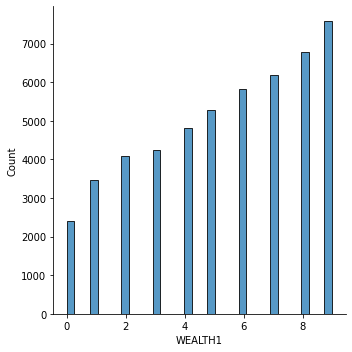

In [120]:
numerical["WEALTH1"].value_counts(dropna=False)
sns.displot(numerical[numerical["WEALTH1"].isna()==False]["WEALTH1"])
plt.show()
numerical["WEALTH1"] = numerical["WEALTH1"].astype('object')
numerical["WEALTH1"] = numerical["WEALTH1"].fillna("9.0")

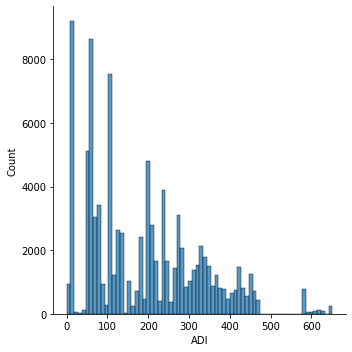

In [121]:
numerical["ADI"].value_counts(dropna=False)
sns.displot(numerical[numerical["ADI"].isna()==False]["ADI"])
plt.show()
numerical["ADI"] =numerical["ADI"].fillna(np.ceil(np.mean(numerical["ADI"])))

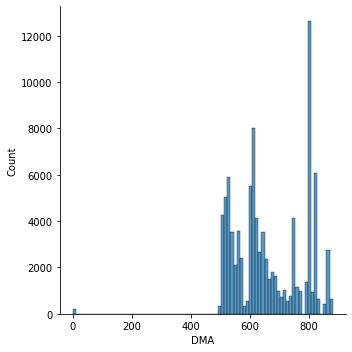

In [122]:
numerical["DMA"].value_counts(dropna=False)
sns.displot(numerical[numerical["DMA"].isna()==False]["DMA"])
plt.show()
numerical["DMA"] =numerical["DMA"].fillna(np.ceil(np.mean(numerical["DMA"])))

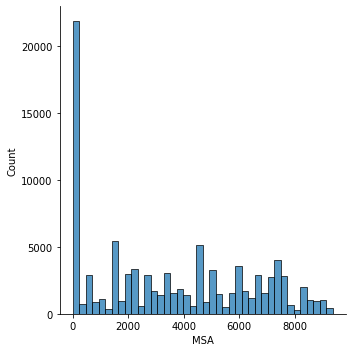

In [123]:
numerical["MSA"].value_counts(dropna=False)
sns.displot(numerical[numerical["MSA"].isna()==False]["MSA"])
plt.show()
numerical["MSA"] =numerical["MSA"].fillna(np.ceil(np.mean(numerical["MSA"])))

In [128]:
#this columns is not mentioned in the lab, so I will drop like the ohters dates
numerical["NEXTDATE"].value_counts(dropna=False)
numerical = numerical.drop(columns ="NEXTDATE")